## GDP Growth Prediction

This notebook aims to predict GDP growth based on historical data, exploring the relationships between GDP growth, population growth, and inflation.
### CRISP-DM
##  Step1: Business Understanding

Goal: Predict GDP growth based on historical data, exploring relationships between GDP growth, population growth, and inflation.

### Import Libraries
*Here, we import necessary libraries for data manipulation (pandas), visualization (matplotlib, seaborn), numerical operations (numpy), model building (scikit-learn). These libraries will be used throughout the notebook.*

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Load and Prepare Data
Read CSV data
*We start by loading the raw data from a CSV file into a pandas DataFrame.*


### Step 2:Data Gathering &  Data Assessing

Data is fetched/gathered/assesed from https://databank.worldbank.org/ for United States of America for the period between 2000 to 2015

In [61]:
# Read CSV data
#file_path = 'C:\\Personal\\Narendra\\UdaCity\\rawData.csv'
#df = pd.read_csv(file_path)
df = pd.read_csv("rawData.csv")
#print(df.head())

### Step 3: Data Preparation 
## Data Cleaning
*The data is reshaped from a wide format (years as columns) to a long format (years as rows) using the `melt` function. This makes it easier to work with for analysis.*




In [62]:
# Melt to long format (years become rows)
melted_df = df.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="Value"
)


*The 'Year' column is cleaned to extract the numeric year from the original string format.*


In [63]:
# Clean year column (extract numeric year)
melted_df["Year"] = melted_df["Year"].str.extract(r"(\d+)").astype(int)


*The data is pivoted again to create the final DataFrame structure, with 'Year' as the index and 'Country Name' and 'Series Name' as columns.*


In [64]:
# Pivot to final shape (years as rows)
final_df = melted_df.pivot(
    index="Year",
    columns=["Country Name", "Series Name"],
    values="Value"
)


*The multi-level column index is flattened for easier access, and specific columns are renamed to more convenient names ('Population_Growth', 'GDP_Growth', 'Inflation').  The code checks for any missing values in the dataset and saves the clean data.*




In [65]:
# Flatten multi-index columns
final_df.columns = [f"{country} - {series}" for country, series in final_df.columns]
final_df = final_df.reset_index()

# Rename specific columns
final_df = final_df.rename(columns={'United States - Population growth (annual %)': 'Population_Growth', 'United States - GDP growth (annual %)': 'GDP_Growth','United States - Inflation, GDP deflator (annual %)':'Inflation'})

#Missing Values: Check with
final_df.isnull().sum()

#print(final_df)
#final_df.to_csv("C:\\Personal\\Narendra\\UdaCity\\cleanData.csv")
final_df.to_csv("cleanData.csv")





### Exploratory Data Analysis (EDA)
*Exploratory data analysis to get the sense of data*

*This section loads the cleaned data and performs basic statistical analysis, including descriptive statistics and correlation analysis.*

*`df.describe()` provides a summary of the central tendency, dispersion and shape of the distribution of the dataset.*

*there are no missing values in the data*

*`df.corr()` computes the pairwise correlation between columns.*

*The correlation matrix helps us understand the linear relationships between different variables.  For example, we can see how GDP Growth is correlated with Population Growth and Inflation.*



In [66]:
def load_and_analyze_data(file_path):
    """
    Load the data from a CSV file and perform basic statistical analysis.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    None

    sample usage:
    load_and_analyze_data('cleanData.csv')
    """
    # Load the data
    df = pd.read_csv(file_path, index_col=0)
    
    # Basic statistical analysis
    print("Statistical Analysis:\n")
    print(df.describe())
    print("\nCorrelation Matrix:\n")
    print(df.corr())
    return df

#  usage
df = load_and_analyze_data('cleanData.csv')


Statistical Analysis:

              Year  Population_Growth  GDP_Growth  Inflation
count    16.000000          16.000000   16.000000  16.000000
mean   2007.500000           0.870453    2.082619   1.982402
std       4.760952           0.119002    1.606099   0.713316
min    2000.000000           0.692860   -2.576500   0.616781
25%    2003.750000           0.735563    1.666437   1.664909
50%    2007.500000           0.899182    2.406467   1.950512
75%    2011.250000           0.947163    2.833092   2.371168
max    2015.000000           1.112769    4.077586   3.135455

Correlation Matrix:

                       Year  Population_Growth  GDP_Growth  Inflation
Year               1.000000          -0.871798   -0.150215  -0.473462
Population_Growth -0.871798           1.000000    0.072866   0.458615
GDP_Growth        -0.150215           0.072866    1.000000   0.518304
Inflation         -0.473462           0.458615    0.518304   1.000000


### Data Visualisation

*The code visualizes the relationship between GDP Growth, Population Growth and Inflation through the scatter plots.*

*We can get some intution about the features that might affect the outcome.*

*Question 1:How reliably can we forecast GDP growth based on readily available indicators like population growth and inflation?"*

*Question 2:Which of the factors (population growth, inflation, and time) has the most influence on GDP growth?"*

*Question 3:Are there significant deviations between predicted and actual GDP growth, and if so, in what years did these occur?"*




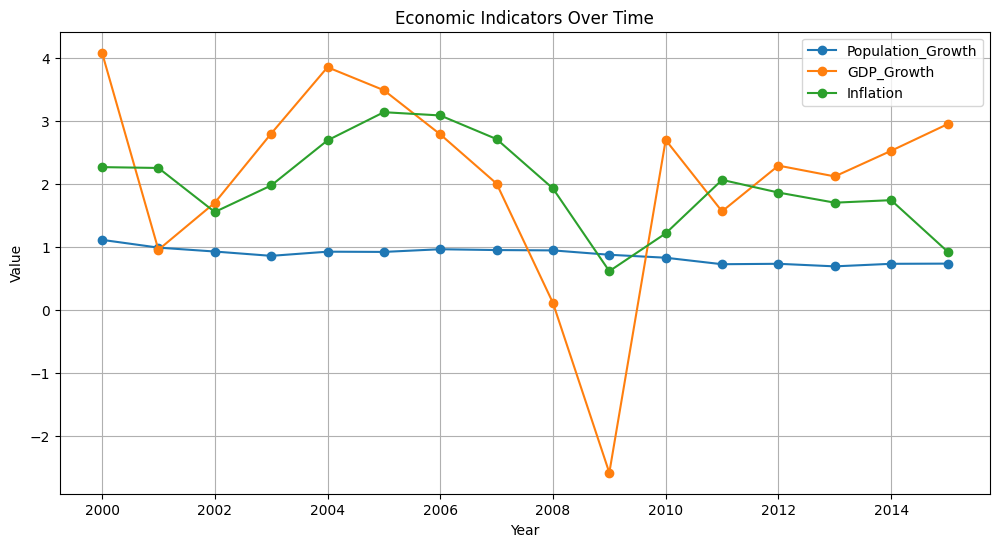

In [67]:
# Time Series Plot
plt.figure(figsize=(12, 6))
for column in ['Population_Growth', 'GDP_Growth', 'Inflation']:
    plt.plot(df['Year'], df[column], label=column, marker='o')
plt.legend()
plt.title('Economic Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

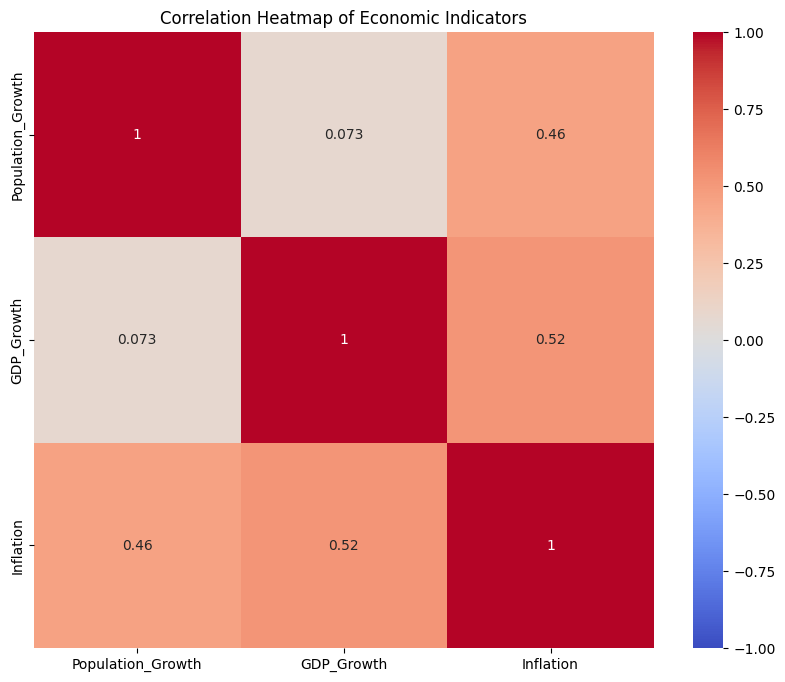

In [68]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Population_Growth', 'GDP_Growth', 'Inflation']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()

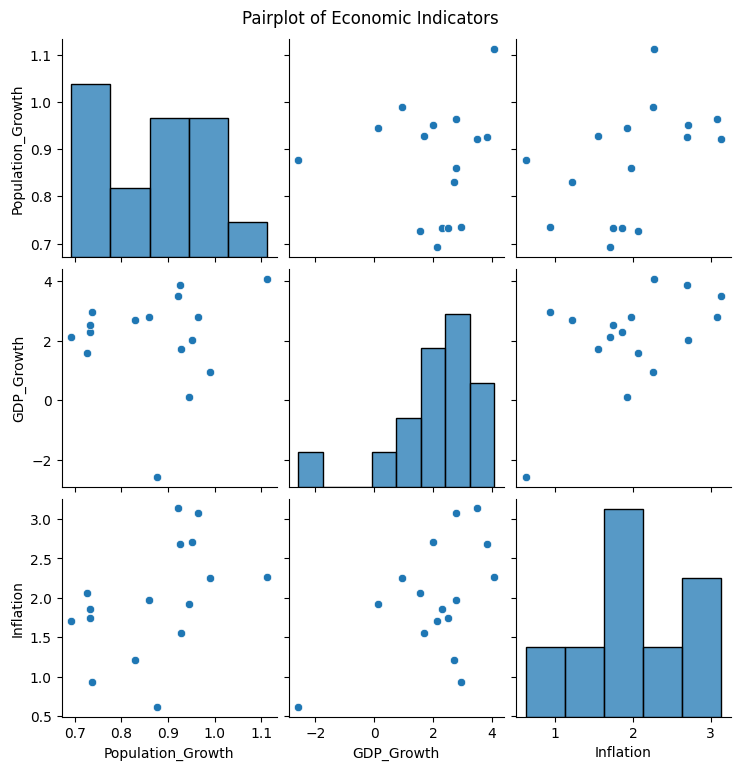

In [69]:
# Pairplot
sns.pairplot(df[['Population_Growth', 'GDP_Growth', 'Inflation']], height=2.5)
plt.suptitle('Pairplot of Economic Indicators', y=1.02)
plt.show()

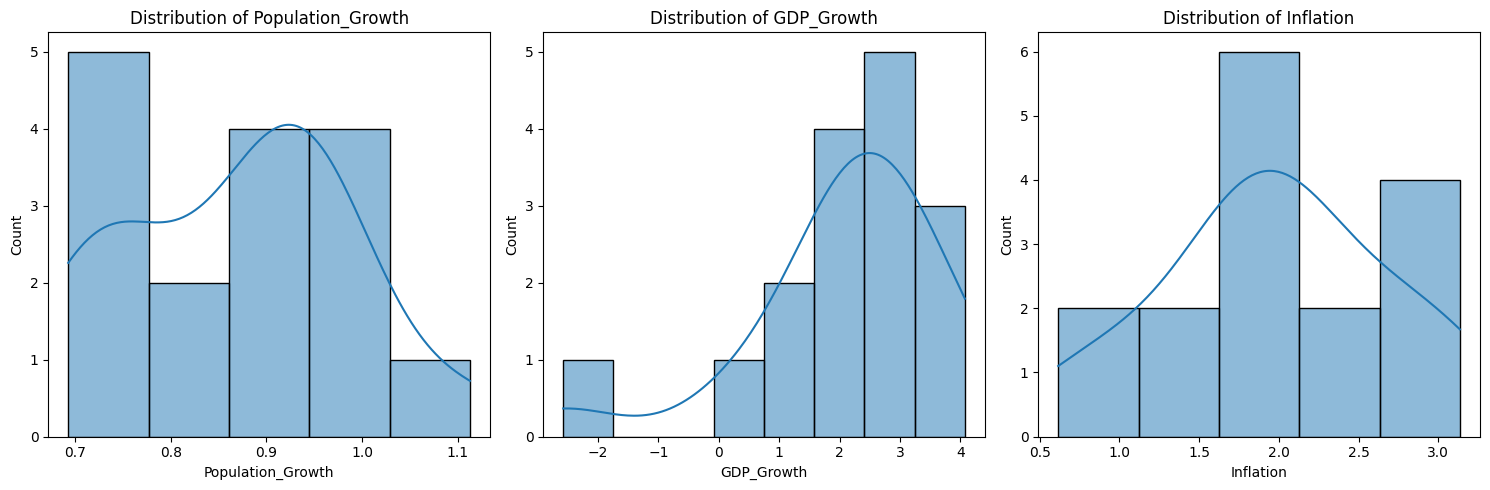

In [70]:
# Distribution Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(['Population_Growth', 'GDP_Growth', 'Inflation']):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

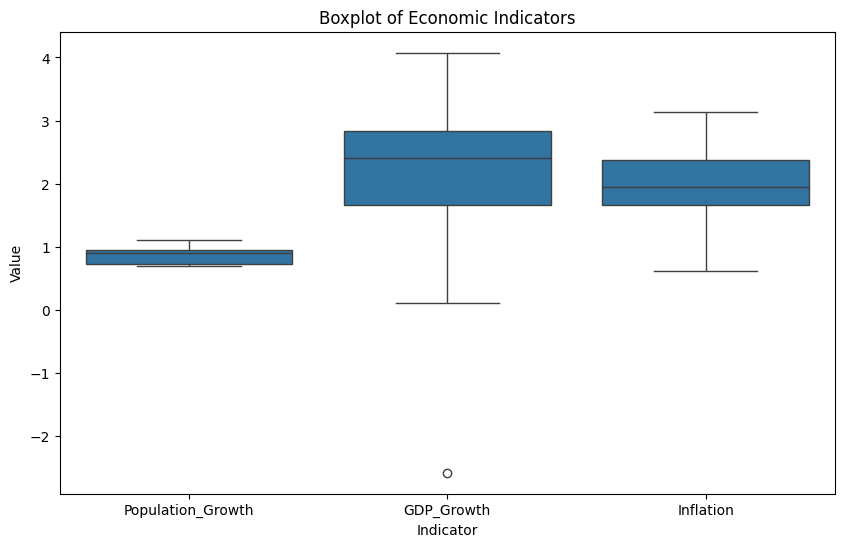

In [71]:
# Boxplot
plt.figure(figsize=(10, 6))
df_melted = df.melt(id_vars=['Year'], value_vars=['Population_Growth', 'GDP_Growth', 'Inflation'])
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Economic Indicators')
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.show()

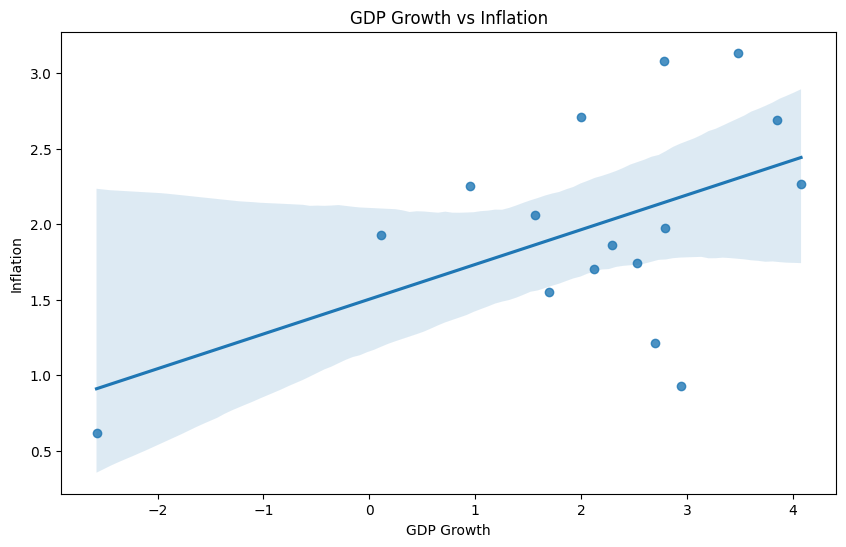

In [72]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP_Growth', y='Inflation', data=df)
plt.title('GDP Growth vs Inflation')
plt.xlabel('GDP Growth')
plt.ylabel('Inflation')
plt.show()

### Step 4:Model Building (Linear Regression)

*Here, we build a linear regression model to predict GDP growth. The 'Population_Growth' and 'Inflation' columns are used as features (independent variables), and 'GDP_Growth' is the target variable (dependent variable).*

*`train_test_split` divides the data into training and testing sets to evaluate the model's performance on unseen data.*

*The model is trained using the training data (`X_train`, `y_train`) and then used to make predictions on the testing data (`X_test`).*


In [73]:


# Prepare the features (X) and target variable (y)
X = df[['Population_Growth', 'Inflation']]
y = df['GDP_Growth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



### Step 5:Model Evaluation 

*   *Mean Squared Error (MSE):* Measures the average squared difference between the predicted and actual values. Lower MSE indicates better model performance.
*   *R-squared:* Represents the proportion of variance in the dependent variable that can be predicted from the independent variables. Higher R-squared indicates a better fit (0 to 1).
*   *Mean Absolute Error (MAE):* Measures the average absolute difference between the predicted and actual values. Lower MAE indicates better model performance.

In [74]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 3.0098
Root Mean Squared Error: 1.7349
Mean Absolute Error: 1.0389
R-squared Score: -1.1609


### Visualizing Results

*This code generates a scatter plot of the actual GDP growth values versus the predicted GDP growth values.*

*Ideally, the predicted values should be close to the actual values, and the points should cluster around the diagonal line.*

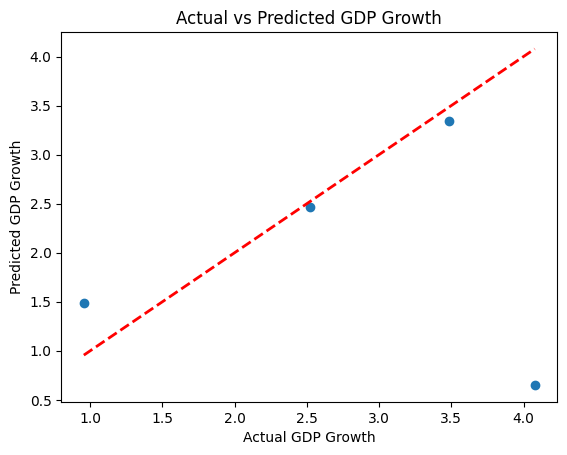


Model Coefficients:
Population_Growth: -6.9389
Inflation: 1.5705
Intercept: 4.8156


In [59]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual GDP Growth")
plt.ylabel("Predicted GDP Growth")
plt.title("Actual vs Predicted GDP Growth")
plt.show()

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

### Conclusion

*   The notebook demonstrates a basic approach to predicting GDP growth using linear regression.
*   The correlation analysis and model evaluation metrics provide insights into the relationships between the variables and the model's predictive power.
